In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import openpyxl

In [3]:
file = pd.ExcelFile('../data/Données_Assurance_S2.xlsx')

In [4]:
file_names = file.sheet_names
file_names

['Clients', 'Contrats', 'Opportunités', 'Mapping_Produits']

In [5]:
clients = pd.read_excel('../data/Données_Assurance_S2.xlsx',sheet_name='Clients')

In [6]:
clients.head()

,ClientID,Nom,Prénom,CIN,DateNaissance,Sexe,SituationFamiliale,Profession,RevenusMensuels,Adresse,Email,Téléphone,WhatsApp
0,1,Ben Ali El Amri,Ahmed Salah,82387512,1981-12-07,F,Marié,Médecin,4041,"97 Rue Imbert - Mutuelleville, Sfax",ahmed.salah@gmail.com,21671364363,21673804239
1,2,Ben Ali Ben Hassen,Ahmed Salah,11727315,1998-02-28,M,Marié,Artisan,1813,"106 Rue Giraud - Centre-Ville, Mahdia",ahmed.salah@gmail.com,21623740587,21694324932
2,3,Ben Ali Tlili,Ahmed Salah,82121072,1980-04-13,M,Marié,Médecin,2867,"164 Rue Guichard - Lac 2, Gafsa",ahmed.salah@gmail.com,21667576259,21689757319
3,4,Ben Ali Belhaj,Ahmed Salah,2858647,2006-01-13,M,Marié,Ingénieur,2994,"156 Rue Colas - Centre-Ville, Sfax",ahmed.salah@gmail.com,21638268772,21694185357
4,5,Ben Ali Mzoughi,Ahmed Salah,52452825,1963-01-15,F,Divorcé,Étudiant,5729,"46 Rue Weber - Ezzahra, Kasserine",ahmed.salah@gmail.com,21679949500,21691349318


dataframe Column types

In [7]:
clients.dtypes

ClientID                       int64
Nom                           object
Prénom                        object
CIN                            int64
DateNaissance         datetime64[ns]
Sexe                          object
SituationFamiliale            object
Profession                    object
RevenusMensuels                int64
Adresse                       object
Email                         object
Téléphone                      int64
WhatsApp                       int64
dtype: object

dataframe shape

In [8]:
clients.shape

(14400, 13)

checking for missing fields

In [9]:
clients.isna().sum()

ClientID              0
Nom                   0
Prénom                0
CIN                   0
DateNaissance         0
Sexe                  0
SituationFamiliale    0
Profession            0
RevenusMensuels       0
Adresse               0
Email                 0
Téléphone             0
WhatsApp              0
dtype: int64

We have no missing values, now let's check for duplicates

In [10]:
clients.duplicated().sum()

np.int64(0)

All rows are unique

Let's analyse some categorical features

In [11]:
categorical = ['Sexe','SituationFamiliale','Profession']
for col in categorical:
    print(f'categories in {col} are:',clients[col].unique())

categories in Sexe are: ['F' 'M']
categories in SituationFamiliale are: ['Marié' 'Divorcé' 'Veuf' 'Célibataire']
categories in Profession are: ['Médecin' 'Artisan' 'Ingénieur' 'Étudiant' 'Professeur' 'Retraité'
 'Employé' 'Commerçant']


Adding age column

In [12]:
clients['age'] = (pd.Timestamp.now().year - clients['DateNaissance'].dt.year)
clients.head()

,ClientID,Nom,Prénom,CIN,DateNaissance,Sexe,SituationFamiliale,Profession,RevenusMensuels,Adresse,Email,Téléphone,WhatsApp,age
0,1,Ben Ali El Amri,Ahmed Salah,82387512,1981-12-07,F,Marié,Médecin,4041,"97 Rue Imbert - Mutuelleville, Sfax",ahmed.salah@gmail.com,21671364363,21673804239,44
1,2,Ben Ali Ben Hassen,Ahmed Salah,11727315,1998-02-28,M,Marié,Artisan,1813,"106 Rue Giraud - Centre-Ville, Mahdia",ahmed.salah@gmail.com,21623740587,21694324932,27
2,3,Ben Ali Tlili,Ahmed Salah,82121072,1980-04-13,M,Marié,Médecin,2867,"164 Rue Guichard - Lac 2, Gafsa",ahmed.salah@gmail.com,21667576259,21689757319,45
3,4,Ben Ali Belhaj,Ahmed Salah,2858647,2006-01-13,M,Marié,Ingénieur,2994,"156 Rue Colas - Centre-Ville, Sfax",ahmed.salah@gmail.com,21638268772,21694185357,19
4,5,Ben Ali Mzoughi,Ahmed Salah,52452825,1963-01-15,F,Divorcé,Étudiant,5729,"46 Rue Weber - Ezzahra, Kasserine",ahmed.salah@gmail.com,21679949500,21691349318,62


Analysing numerical features

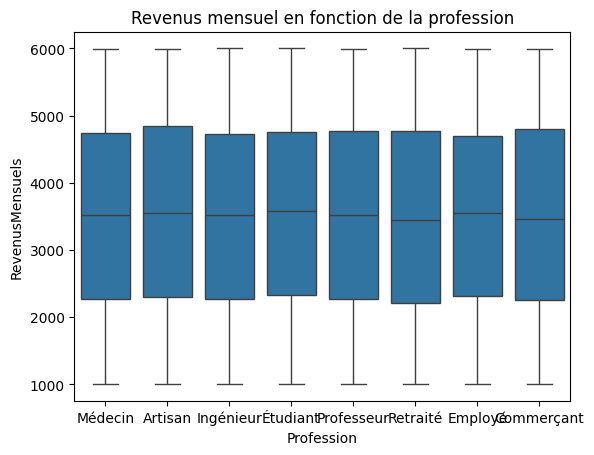

In [13]:
sns.boxplot(x='Profession',y='RevenusMensuels',data=clients)
plt.title('Revenus mensuel en fonction de la profession')
plt.show()

In [14]:
result = clients.groupby('Profession')['RevenusMensuels'].agg(['min','max','mean'])
result = result.rename(columns = {
    'min':'RevenueMensuel minimale',
    'max':'RevenueMensuel maximale',
    'mean':'moyenne'
    
})
result

,RevenueMensuel minimale,RevenueMensuel maximale,moyenne
Profession,,,
Artisan,1003,5995,3547.022309
Commerçant,1002,5997,3506.813668
Employé,1000,5995,3492.704954
Ingénieur,1004,5999,3510.440524
Médecin,1007,5997,3516.312088
Professeur,1002,5998,3515.876092
Retraité,1001,6000,3498.609358
Étudiant,1000,6000,3540.460519


Conclusion: monthly revenue is not affected by the client's profession which shows that the simulated data is badly generated.

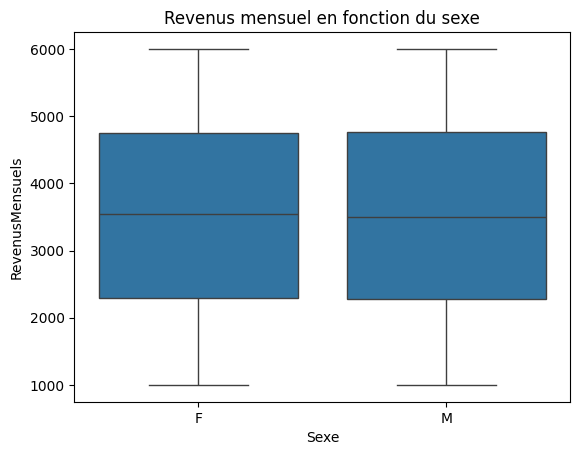

In [15]:
sns.boxplot(x='Sexe',y='RevenusMensuels',data=clients)
plt.title('Revenus mensuel en fonction du sexe')
plt.show()

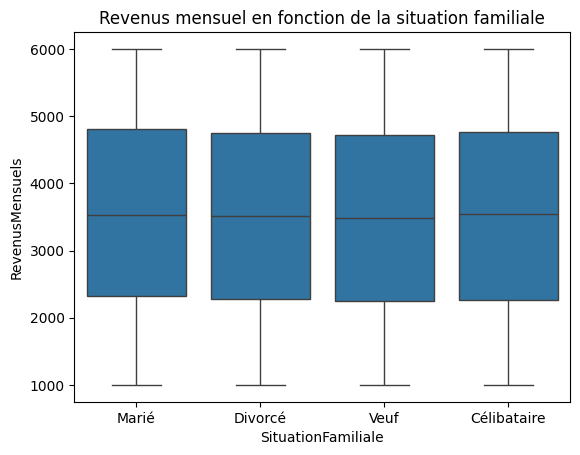

In [16]:
sns.boxplot(x='SituationFamiliale',y='RevenusMensuels',data=clients)
plt.title('Revenus mensuel en fonction de la situation familiale')
plt.show()

Conclusion: neither sexe nor client's status affect his salary.

Let's look at our clients age distribution (age is an important factor for recommending insurance plans)

In [17]:
clients['age'].agg(['min','max'])

min    18
max    76
Name: age, dtype: int32

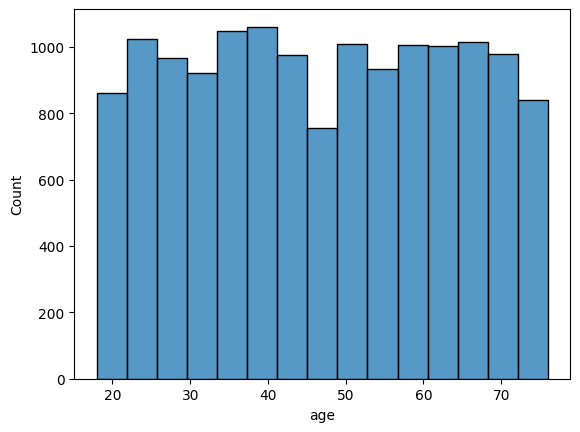

In [18]:
sns.histplot(data=clients,x='age',bins=15)
plt.show()

In [19]:
clients.to_pickle('../data/clients.pkl')